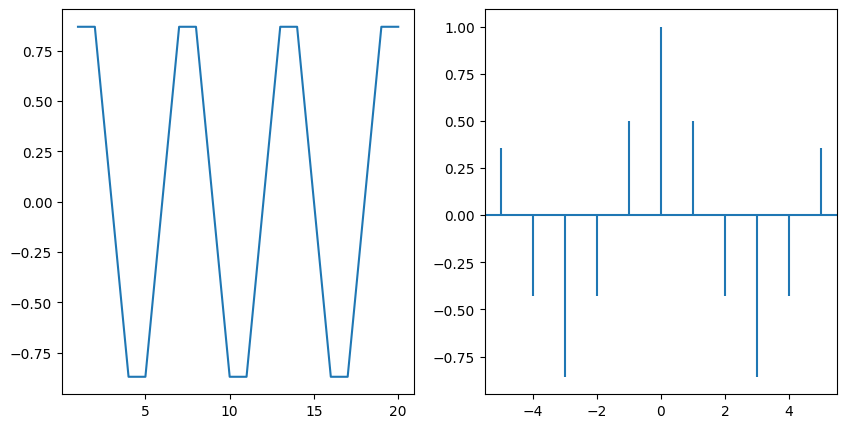

In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

x=np.asarray([i for i in range(1,21)]);
y=np.round(np.sin(x*np.pi/3),2);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(10, 5)
axes[0].plot(x,y);
axes[1].acorr(y,maxlags=5);

In [2]:
acf=np.asarray(sm.tsa.stattools.ccf(y, y, adjusted=False))
print(acf)
print(acf.shape)

[ 1.          0.50652174 -0.42173913 -0.85724638 -0.43768116  0.3442029
  0.7057971   0.35724638 -0.28115942 -0.57173913 -0.29710145  0.19492754
  0.4115942   0.20797101 -0.14057971 -0.28623188 -0.15652174  0.04565217
  0.1173913   0.05869565]
(20,)


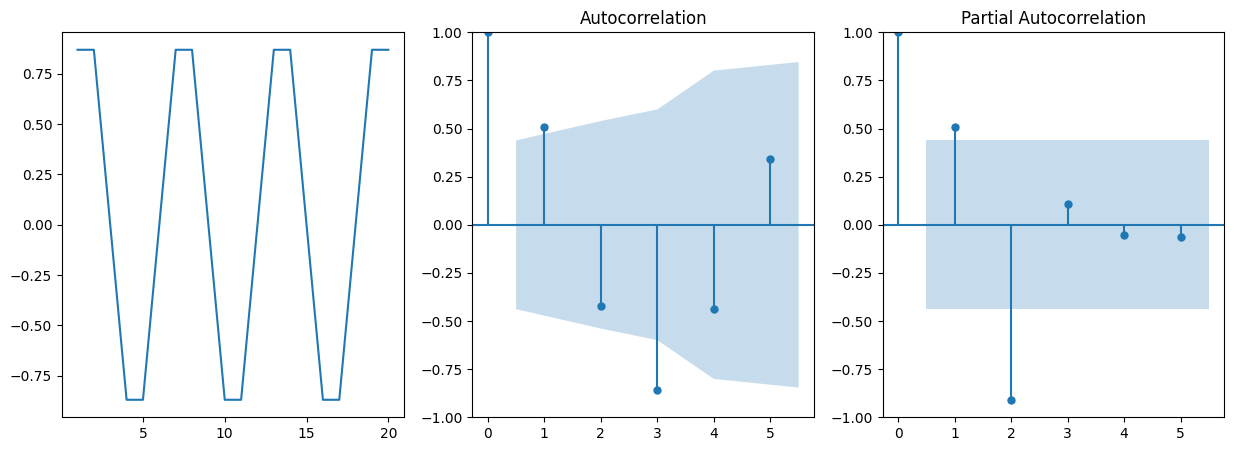

In [85]:
y1=np.round(np.sin(x*np.pi/3),2);
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axes[0].plot(x,y1)
plot_acf(y1,lags=5,ax=axes[1]);
plot_pacf(y1,lags=5,method="ywm",ax=axes[2]);

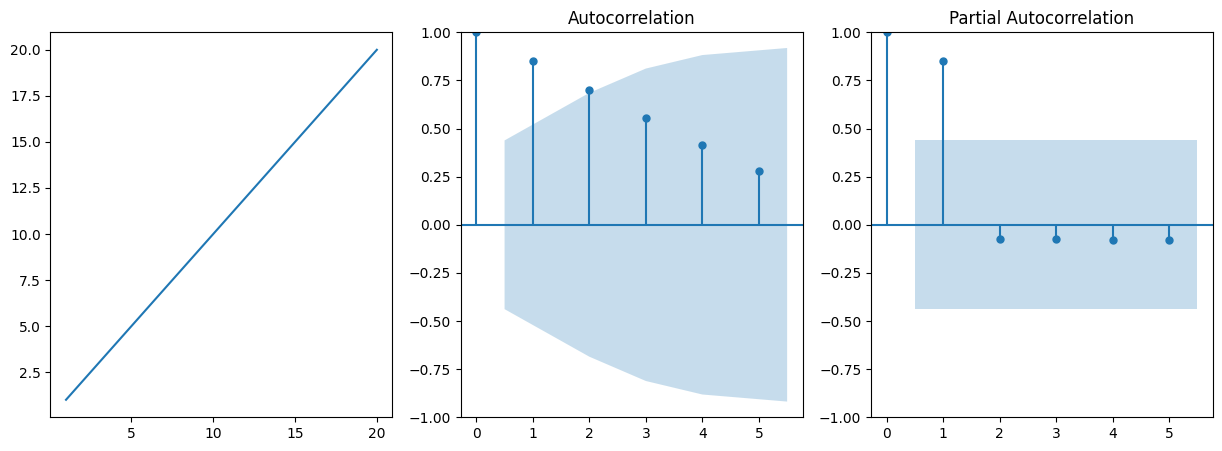

In [4]:
y2=x;
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axes[0].plot(x,y2)
plot_acf(y2,lags=5,ax=axes[1]);
plot_pacf(y2,lags=5,method="ywm",ax=axes[2]);

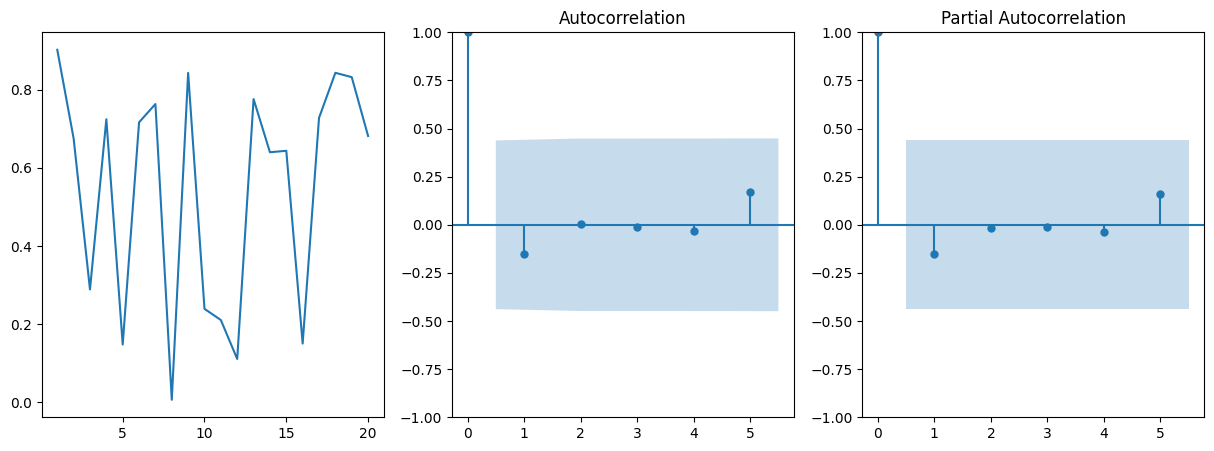

In [5]:
y3=np.random.random(20)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axes[0].plot(x,y3)
plot_acf(y3,lags=5,ax=axes[1]);
plot_pacf(y3,lags=5,method="ywm",ax=axes[2]);

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

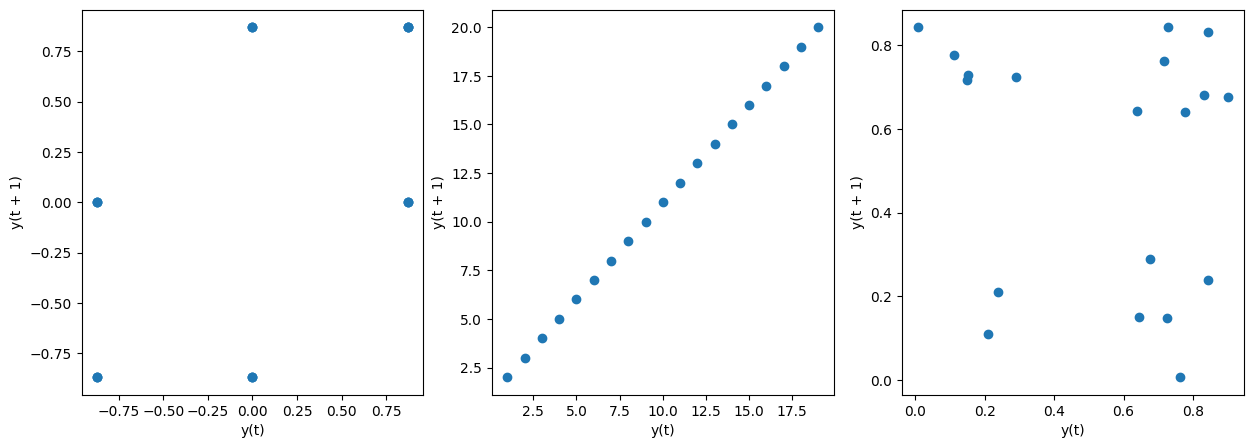

In [6]:
df_s1=pd.DataFrame(y1,dtype=float)
df_s2=pd.DataFrame(y2,dtype=float)
df_s3=pd.DataFrame(y3,dtype=float)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5)
pd.plotting.lag_plot(df_s1, lag=1,ax=axes[0])
pd.plotting.lag_plot(df_s2, lag=1,ax=axes[1])
pd.plotting.lag_plot(df_s3, lag=1,ax=axes[2])

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7332993604108922.000000
p-value: 0.000000
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691


In [8]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.758906
p-value: 0.401046
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


In [9]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y3)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.992265
p-value: 0.000023
Critical Values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


In [10]:
from statsmodels.tsa.stattools import kpss
result = kpss(y1)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

KPSS Statistic: 0.051227
p-value: 0.100000


/var/folders/m5/zp3_wfwn3czf_nn8mgss6czw0000gn/T/ipykernel_777/1058510785.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(y1)


In [11]:
result = kpss(y2)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

KPSS Statistic: 0.770857
p-value: 0.010000


/var/folders/m5/zp3_wfwn3czf_nn8mgss6czw0000gn/T/ipykernel_777/3689544829.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(y2)


In [12]:
y2d=np.diff(y2,n=1)
y2d

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
result = kpss(y3)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

KPSS Statistic: 0.157646
p-value: 0.100000


/var/folders/m5/zp3_wfwn3czf_nn8mgss6czw0000gn/T/ipykernel_777/2982429240.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(y3)


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [15]:
y1

array([ 0.87,  0.87,  0.  , -0.87, -0.87, -0.  ,  0.87,  0.87,  0.  ,
       -0.87, -0.87, -0.  ,  0.87,  0.87,  0.  , -0.87, -0.87, -0.  ,
        0.87,  0.87])

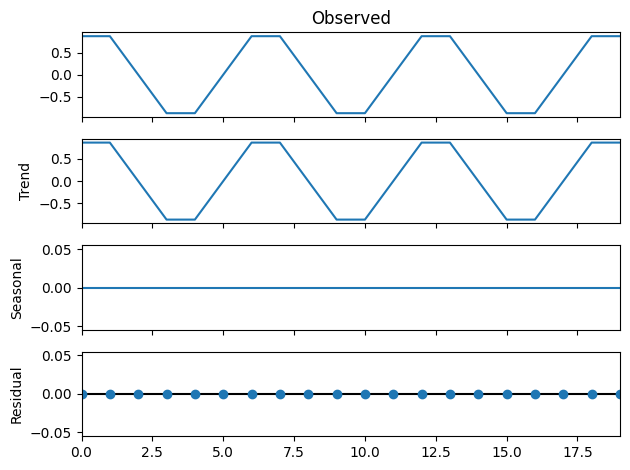

In [16]:
result=seasonal_decompose(y1,model="additive",period=1)
result.plot();

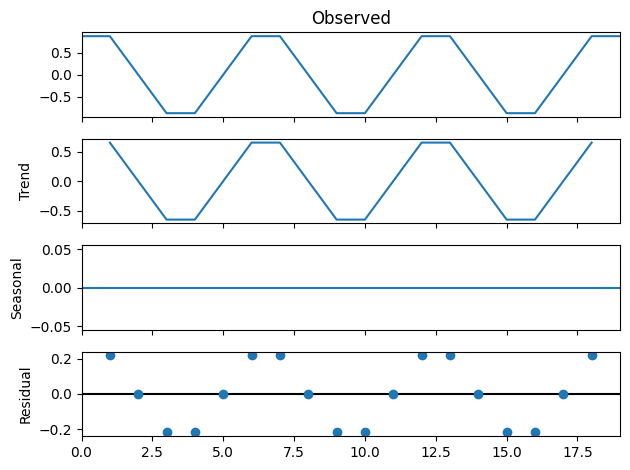

In [17]:
result=seasonal_decompose(y1,model="additive",period=2)
result.plot();

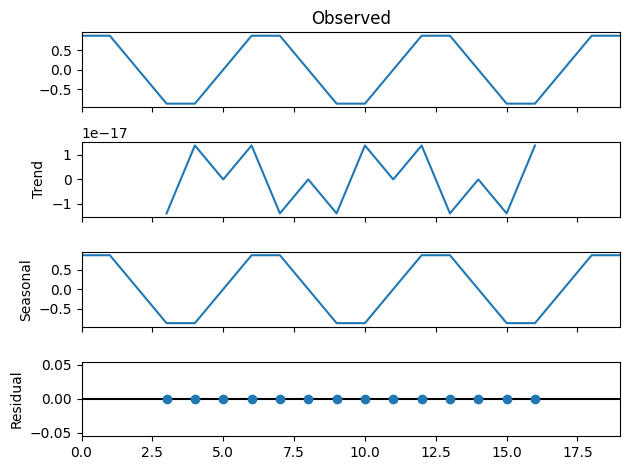

In [18]:
result=seasonal_decompose(y1,model="additive",period=6)
result.plot();

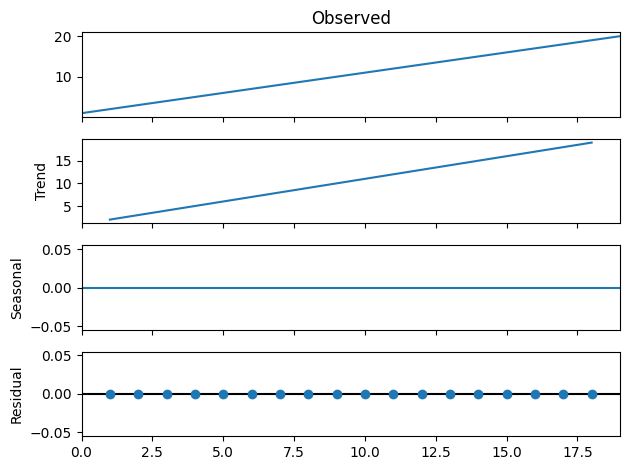

In [19]:
result=seasonal_decompose(y2,model="additive",period=2)
result.plot();

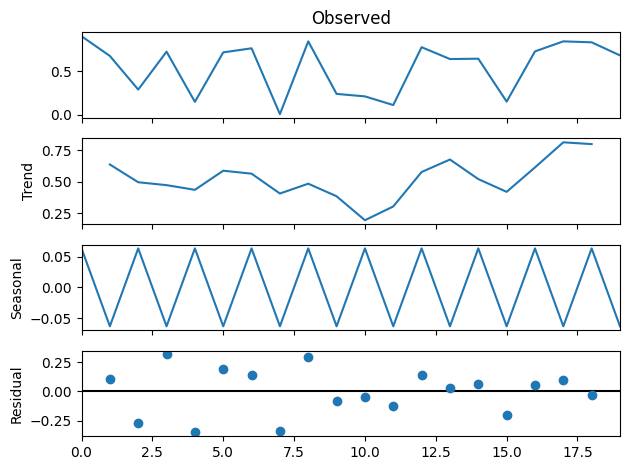

In [20]:
result=seasonal_decompose(y3,model="additive",period=2)
result.plot();

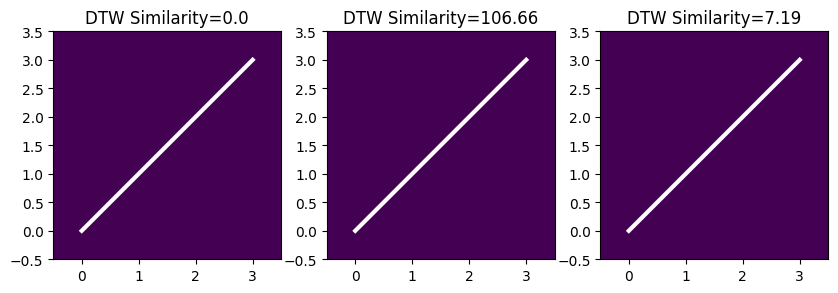

In [21]:
from scipy.spatial.distance import cdist
from tslearn import metrics

z1=np.tile(y1,[4,1])
z2=np.tile(y2,[4,1])
z3=np.tile(y3,[4,1])

a=[z1,z1,z1]
b=[z1,z2,z3]
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10, 10)
for i in range(3):
    path, sim = metrics.dtw_path(a[i], b[i])
    mat = cdist(a[i], b[i])
    axes[i].imshow(mat, origin='lower')
    axes[i].autoscale(False)
    axes[i].plot([j for (i, j) in path], [i for (i, j) in path], "w-",
             linewidth=3.)
    axes[i].set_title("DTW Similarity="+str(round(sim,2)));

In [37]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [76]:
x_p=[i+len(x)+1 for i in range(len(x))]

In [77]:
x_p

[21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [78]:
from statsmodels.tsa.arima.model import ARIMA

In [108]:
modelo1_y1=ARIMA(y1,order=(2,0,3))
m1_y1=modelo1_y1.fit()
print("MSE",m1_y1.mse)
print("AIC",m1_y1.aic)
m1_y1.summary()

MSE 0.04730505877862737
AIC -257.837157769527


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 135.919
Date:                Wed, 27 Mar 2024   AIC                           -257.837
Time:                        13:35:28   BIC                           -250.867
Sample:                             0   HQIC                          -256.477
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.031e-06      0.000      0.018      0.986      -0.000       0.000
ar.L1          1.0001      0.001   1277.097      0.000       0.999       1.002
ar.L2         -1.0000   7.99e-07  -1.25e+06      0.000      -1.000      -1.000
ma.L1          1.0000   2.16e-07   4.63e+06      0.000       1.000       1.000
ma.L2         -1.0000   2.16e-07  -4.63e+06      0.000      -1.000      -1.000
ma.L3         -1.0000   2.16e-07  -4.64e+06      0.000      -1.000      -1.000
sigma2      9.555e-09   6.85e-09      1.394      0.163   -3.88e-09     2.3e-08
===================================================================================
Ljung-Box (L1) (Q):                   3.82   Jarque-Bera (JB):                72.80
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             2.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.5e+23. Standard errors may be unstable.
"""

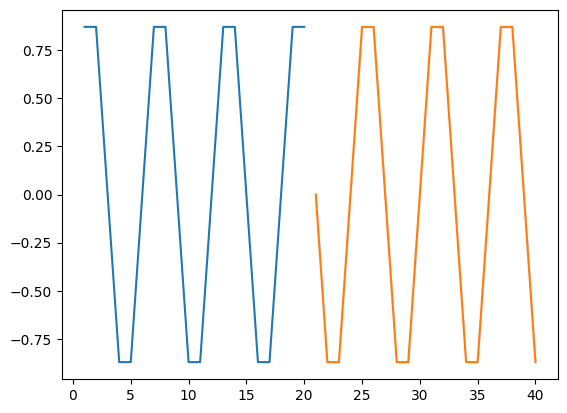

In [89]:
m1_y1_p = m1_y1.get_forecast(steps=len(y1))
m1_y1_ci = m1_y1_p.conf_int(0.05)
plt.plot(x,y1,x_p,m1_y1_p.predicted_mean)
plt.fill_between(x_p, m1_y1_ci[:,0], m1_y1_ci[:,1], color='b', alpha=.15)

MSE 0.16214547944804542
AIC 27.157156596233836


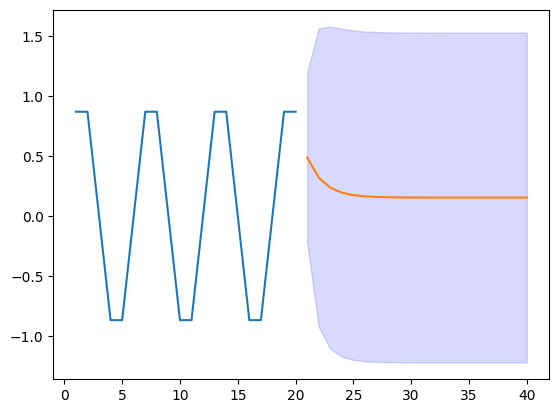

In [107]:
modelo2_y1=ARIMA(y1,order=(1,0,1))
m2_y1=modelo2_y1.fit()
m2_y1_p = m2_y1.get_forecast(steps=len(y1))
m2_y1_ci = m2_y1_p.conf_int(0.05)
plt.plot(x,y1,x_p,m2_y1_p.predicted_mean)
plt.fill_between(x_p, m2_y1_ci[:,0], m2_y1_ci[:,1], color='b', alpha=.15);
print("MSE",m2_y1.mse)
print("AIC",m2_y1.aic)
#m2_y1.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


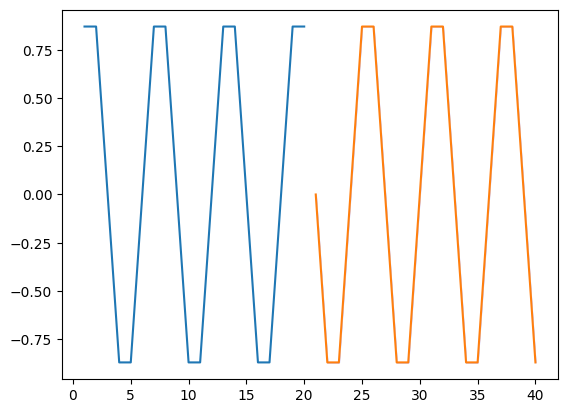

In [109]:
modelo2_y1=ARIMA(y1,order=(2,0,0))
m2_y1=modelo2_y1.fit()
m2_y1_p = m2_y1.get_forecast(steps=len(y1))
m2_y1_ci = m2_y1_p.conf_int(0.05)
plt.plot(x,y1,x_p,m2_y1_p.predicted_mean)
plt.fill_between(x_p, m2_y1_ci[:,0], m2_y1_ci[:,1], color='b', alpha=.15)
#m2_y1.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


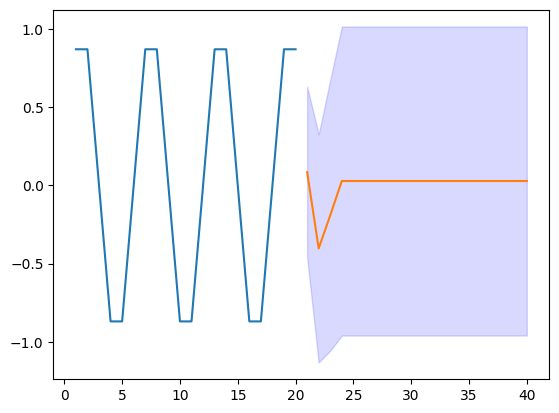

In [110]:
modelo3_y1=ARIMA(y1,order=(0,0,3))
m3_y1=modelo3_y1.fit()
m3_y1_p = m3_y1.get_forecast(steps=len(y1))
m3_y1_ci = m3_y1_p.conf_int(0.05)
plt.plot(x,y1,x_p,m3_y1_p.predicted_mean)
plt.fill_between(x_p, m3_y1_ci[:,0], m3_y1_ci[:,1], color='b', alpha=.15)
#m2_y1.summary()

MSE 1.0000000000027345
AIC 55.91966426279619


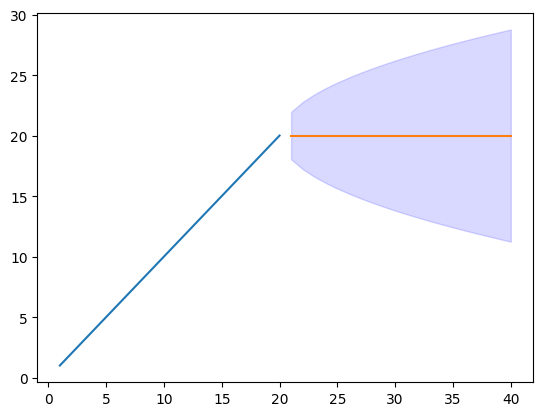

In [115]:
modelo1_y2=ARIMA(y2,order=(0,1,0))
m1_y2=modelo1_y2.fit()
m1_y2_p = m1_y2.get_forecast(steps=len(y2))
m1_y2_ci = m1_y2_p.conf_int(0.05)
plt.plot(x,y2,x_p,m1_y2_p.predicted_mean)
plt.fill_between(x_p, m1_y2_ci[:,0], m1_y2_ci[:,1], color='b', alpha=.15)
print("MSE",m1_y2.mse)
print("AIC",m1_y2.aic)

MSE 0.09999999925121683
AIC -157.49318591786607


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


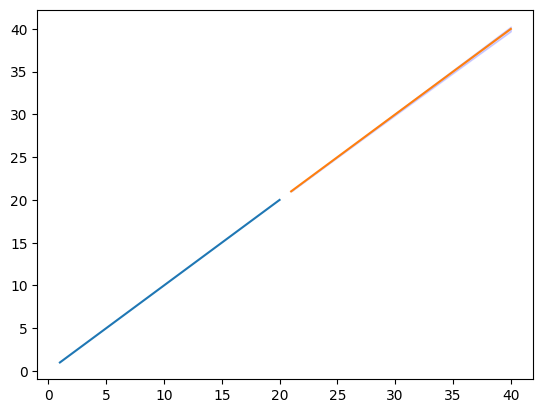

In [122]:
modelo2_y2=ARIMA(y2,order=(1,1,0))
m2_y2=modelo2_y2.fit()
m2_y2_p = m2_y2.get_forecast(steps=len(y2))
m2_y2_ci = m2_y2_p.conf_int(0.05)
plt.plot(x,y2,x_p,m2_y2_p.predicted_mean)
plt.fill_between(x_p, m2_y2_ci[:,0], m2_y2_ci[:,1], color='b', alpha=.15)
print("MSE",m2_y2.mse)
print("AIC",m2_y2.aic)